# California Housing Prices - Training and Testing

**Key notes:**
- Model Selection
- Parameter Tuning
- Performance Testing

In [1]:
import pandas as pd
import numpy as np
from scipy.special import boxcox1p 
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
X_train = pd.read_csv("X_train_cleaned_selected.csv").values
y_train = pd.read_csv("y_train.csv").values

In [3]:
print(X_train.shape)
print(y_train.shape)

(12177, 9)
(12177, 1)


## Model Selection

In [4]:
def evaluate_performance_of_model(X_train, y_train, model_name):
    result = {}
    result["Model"] = model_name
    
    if model_name == "Linear":
        model = LinearRegression()
    if model_name == "Ridge":
        model = Ridge(random_state=0)
    if model_name == "Lasso":
        model = Lasso(random_state=0)     
    if model_name == "SVR":
        model = SVR()
    if model_name == "Decision Tree":
        model = DecisionTreeRegressor(random_state=0)
    if model_name == "Random Forest":
        model = RandomForestRegressor(random_state=0)
    if model_name == "Gradient Boosting":
        model = GradientBoostingRegressor(random_state=0)

    # Get the R2 value
    r2_scores = cross_val_score(model, X_train, y_train, cv=5, scoring="r2")
    r2 = np.sqrt(r2_scores).mean()
    result["R2"] = round(r2, 3)

    # Get the RMSE value 
    rmse_scores = cross_val_score(model, X_train, y_train, cv=5, scoring="neg_mean_squared_error")
    rmse = np.sqrt(-rmse_scores).mean()
    result["RMSE"] = round(rmse, 3)
    
    return result 

In [5]:
def evaluate_performance(X_train, y_train):
    results = []
    for model_name in ["Linear", "Ridge", "Lasso", "SVR", "Decision Tree", "Random Forest", "Gradient Boosting"]:
        result = evaluate_performance_of_model(X_train, y_train, model_name)
        results.append(result)
    results_df = pd.DataFrame(results)
    return results_df

In [6]:
results_df = evaluate_performance(X_train, y_train)
results_df

/Users/zyzhao/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 17293870150593.93, tolerance: 11083077453.567163
  model = cd_fast.enet_coordinate_descent(
/Users/zyzhao/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 20110630355457.44, tolerance: 11087137354.109846
  model = cd_fast.enet_coordinate_descent(
/Users/zyzhao/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 20781414887991.8, tolerance: 11145366718.439936
  model = cd_fast.enet_coordinate_descent(
/Users/zyzhao/opt/anaconda3/lib/python3.8/site-packages/sklearn/line

/Users/zyzhao/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/zyzhao/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/zyzhao/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/zyzhao/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-ve

,Model,R2,RMSE
0,Linear,0.758,69771.744
1,Ridge,0.758,69769.273
2,Lasso,0.758,69767.782
3,SVR,NaN,108945.548
4,Decision Tree,0.770,68231.530
5,Random Forest,0.887,49331.398
6,Gradient Boosting,0.874,52093.932


In [27]:
def plot_scores_by_model(results_df):
    fig,axes = plt.subplots(2, 1, figsize=(12,8), dpi=300)
    palette = sns.color_palette("Set3", results_df.shape[0])
    sns.barplot(x="Model", y="R2", data=results_df, ax=axes[0], alpha=0.8, palette=palette)
    sns.barplot(x="Model", y="RMSE", data=results_df, ax=axes[1], alpha=0.8, palette=palette)
    for ax in axes:
        for p in ax.patches:
            ax.annotate(format(p.get_height(), ".3f"), 
                        (p.get_x()+p.get_width()/2, p.get_y()+p.get_height()), 
                        ha="center", va="top", xytext=(0, 10), textcoords="offset points")
    plt.show()

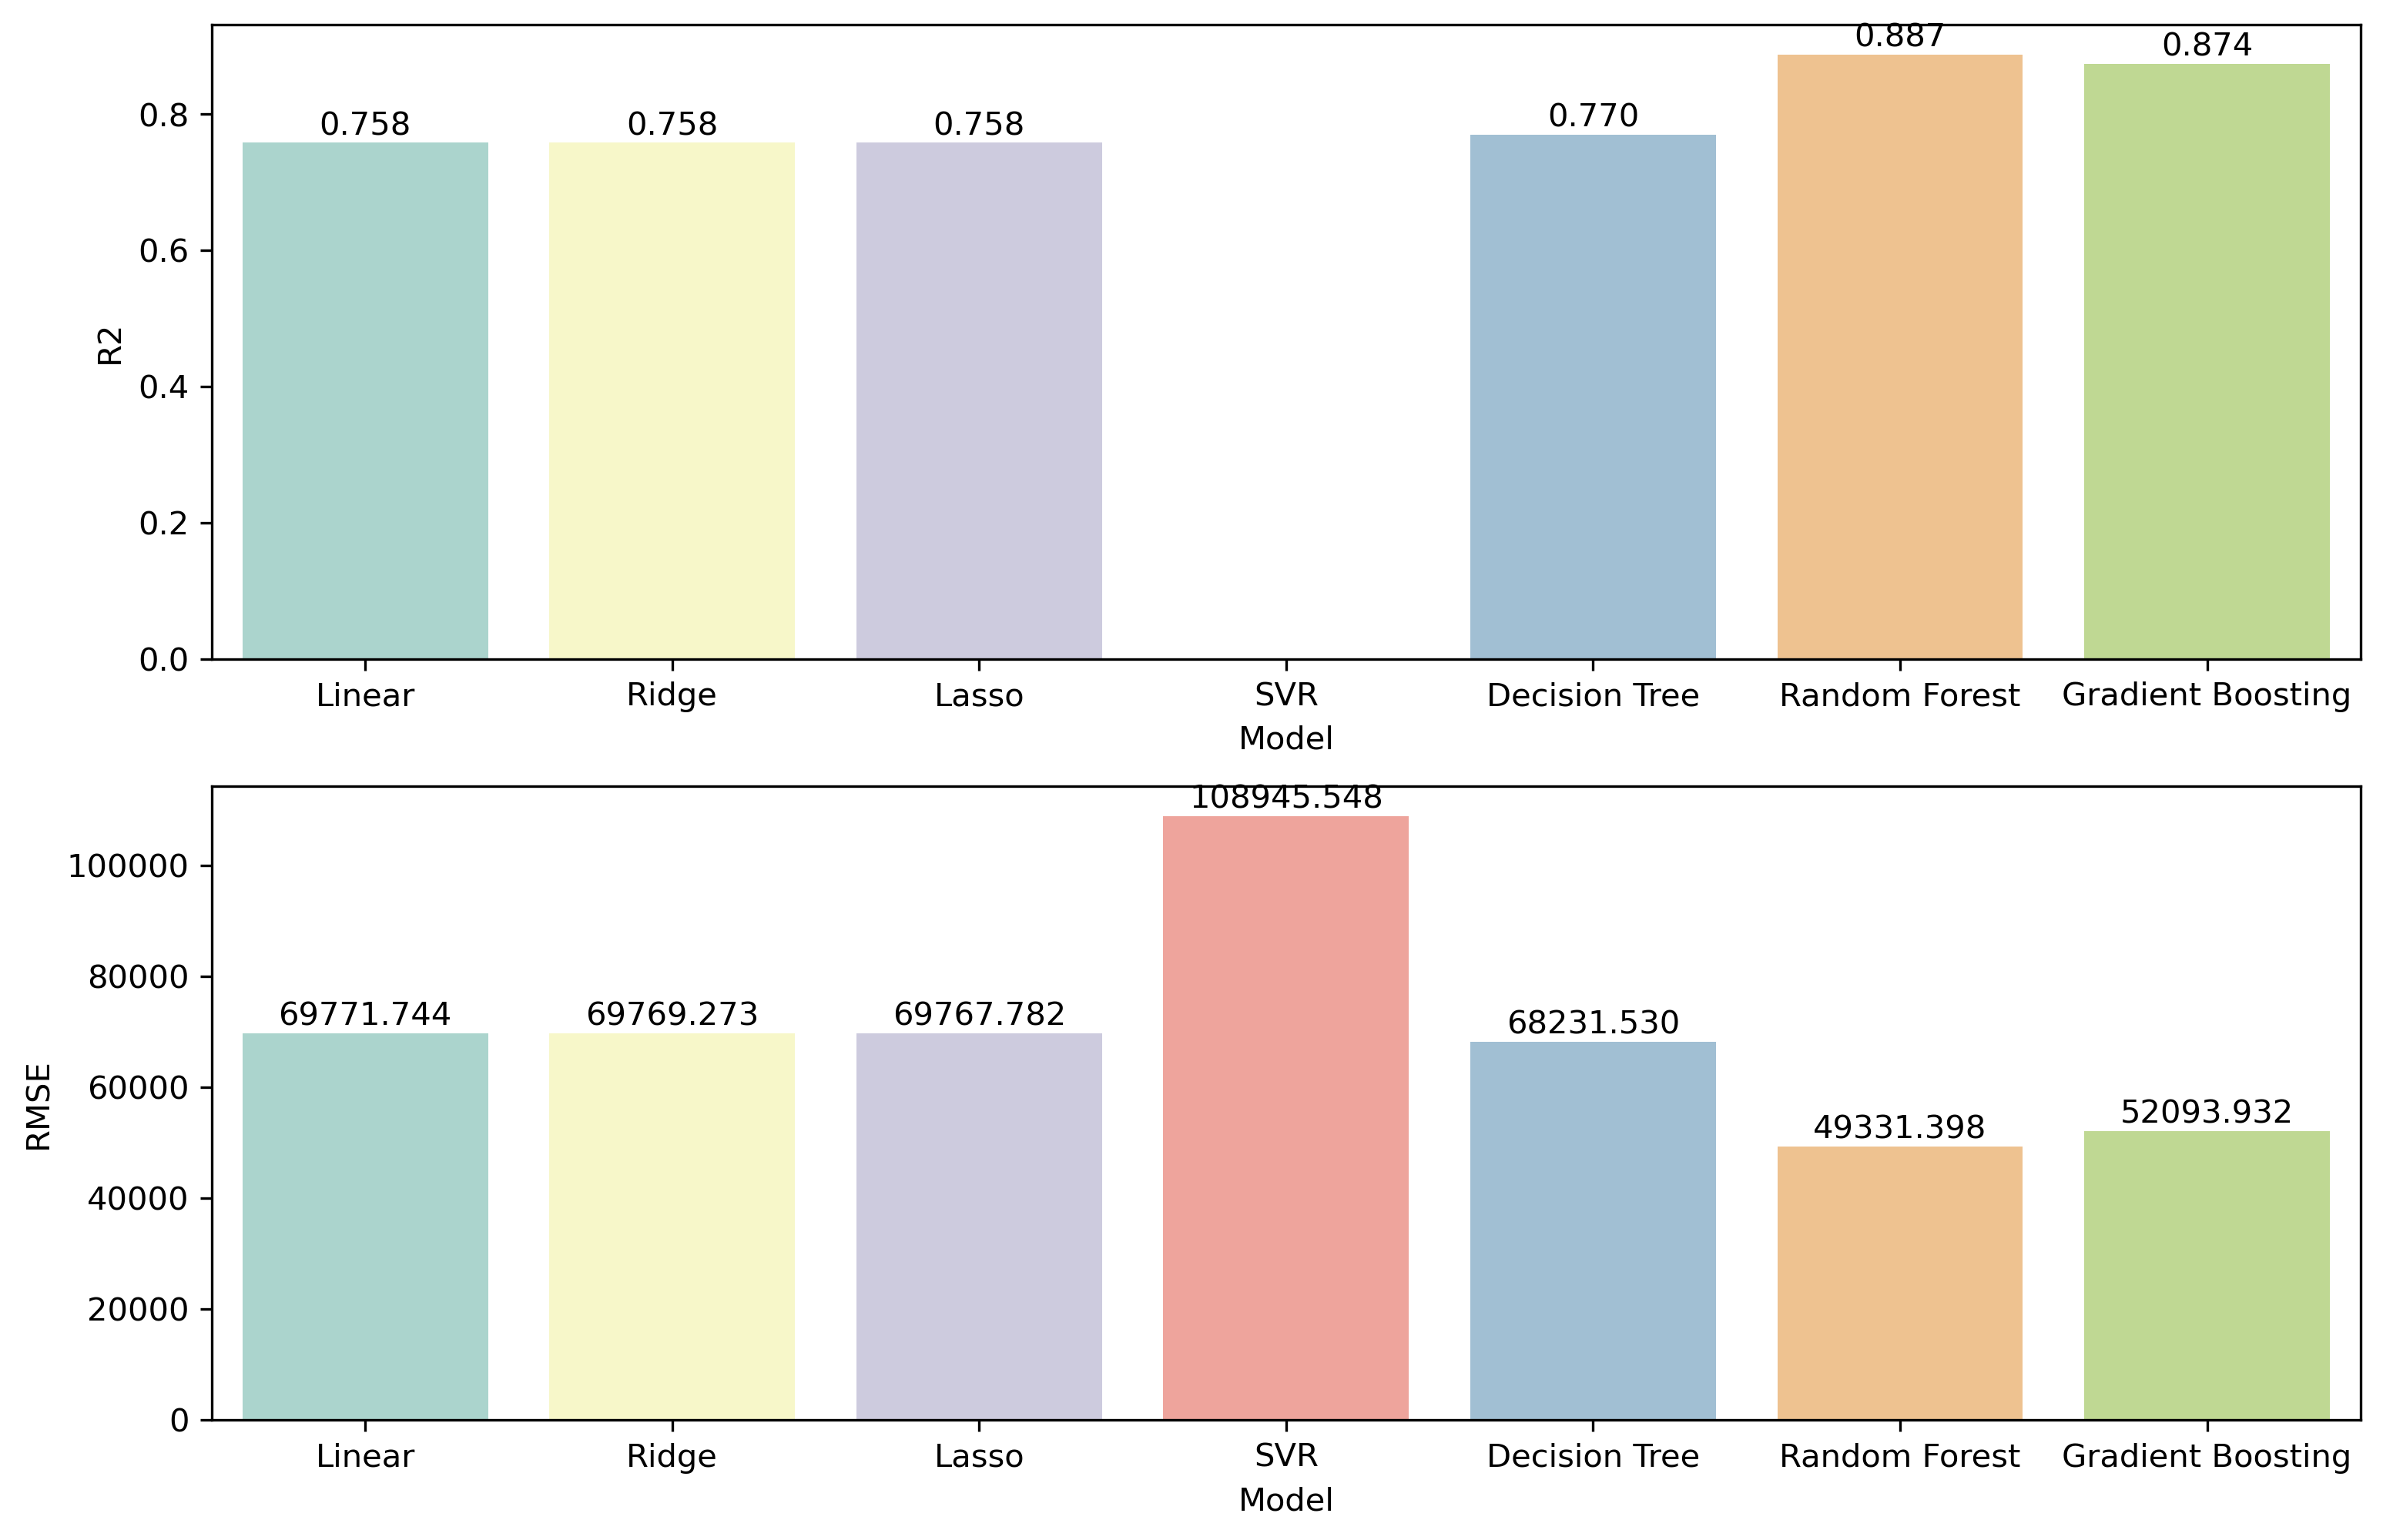

In [28]:
plot_scores_by_model(results_df)

It turns out that **Random Forest** and **Gradient Boosting** have relatively higher R2 values and lower RMSE values. Hence, only the parameters of these two models are tuned.

## Parameter Tuning

## Performance Testing